# Vehicle Polynomial Regression

In [90]:
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style as st
st.use("ggplot")
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import  mean_squared_error
from sklearn import ensemble

In [91]:
data = pd.read_csv('VehicleInsuranceData.csv') 
da = data.drop("Unnamed: 0",axis=1)
da.head(15)

,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,5380.898636,Yes,Basic,College,Employed,F,55350,Suburban,Married,67,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,7216.100311,No,Premium,Master,Unemployed,M,0,Urban,Single,101,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,7388.178085,No,Extended,College,Employed,F,28812,Urban,Married,93,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
9,4738.992022,No,Basic,College,Unemployed,M,0,Suburban,Single,67,...,5,0,3,Personal Auto,Personal L3,Offer1,Agent,482.400000,Four-Door Car,Small


# data wrangling

In [92]:
da.isnull().sum()

clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [93]:
da.isna().sum()

clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [94]:
da.drop_duplicates().head()

,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [95]:
da.describe()

,clv,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,6725.281515,37586.405794,91.677057,15.084473,48.004287,0.389108,3.020626,427.131607
std,3934.876313,30453.838594,32.648209,10.048979,27.880693,0.920491,2.445994,282.722326
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3858.177183,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.881398
50%,5569.220419,33817.000000,81.000000,14.000000,48.000000,0.000000,2.000000,376.880363
75%,8456.408530,62250.750000,108.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,21235.445570,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [96]:
da.corr()

,clv,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
clv,1.000000,0.026669,0.411617,0.007968,-0.010445,-0.039209,0.172309,0.229030
Income,0.026669,1.000000,-0.026219,-0.028665,-0.001242,0.002393,-0.008423,-0.364857
Monthly.Premium.Auto,0.411617,-0.026219,1.000000,0.006544,0.011147,-0.013692,0.002590,0.620604
Months.Since.Last.Claim,0.007968,-0.028665,0.006544,1.000000,-0.044980,0.005016,0.010207,0.005582
Months.Since.Policy.Inception,-0.010445,-0.001242,0.011147,-0.044980,1.000000,-0.001763,-0.012213,-0.002981
Number.of.Open.Complaints,-0.039209,0.002393,-0.013692,0.005016,-0.001763,1.000000,-0.001043,-0.012321
Number.of.Policies,0.172309,-0.008423,0.002590,0.010207,-0.012213,-0.001043,1.000000,0.005799
Total.Claim.Amount,0.229030,-0.364857,0.620604,0.005582,-0.002981,-0.012321,0.005799,1.000000


# Plotting

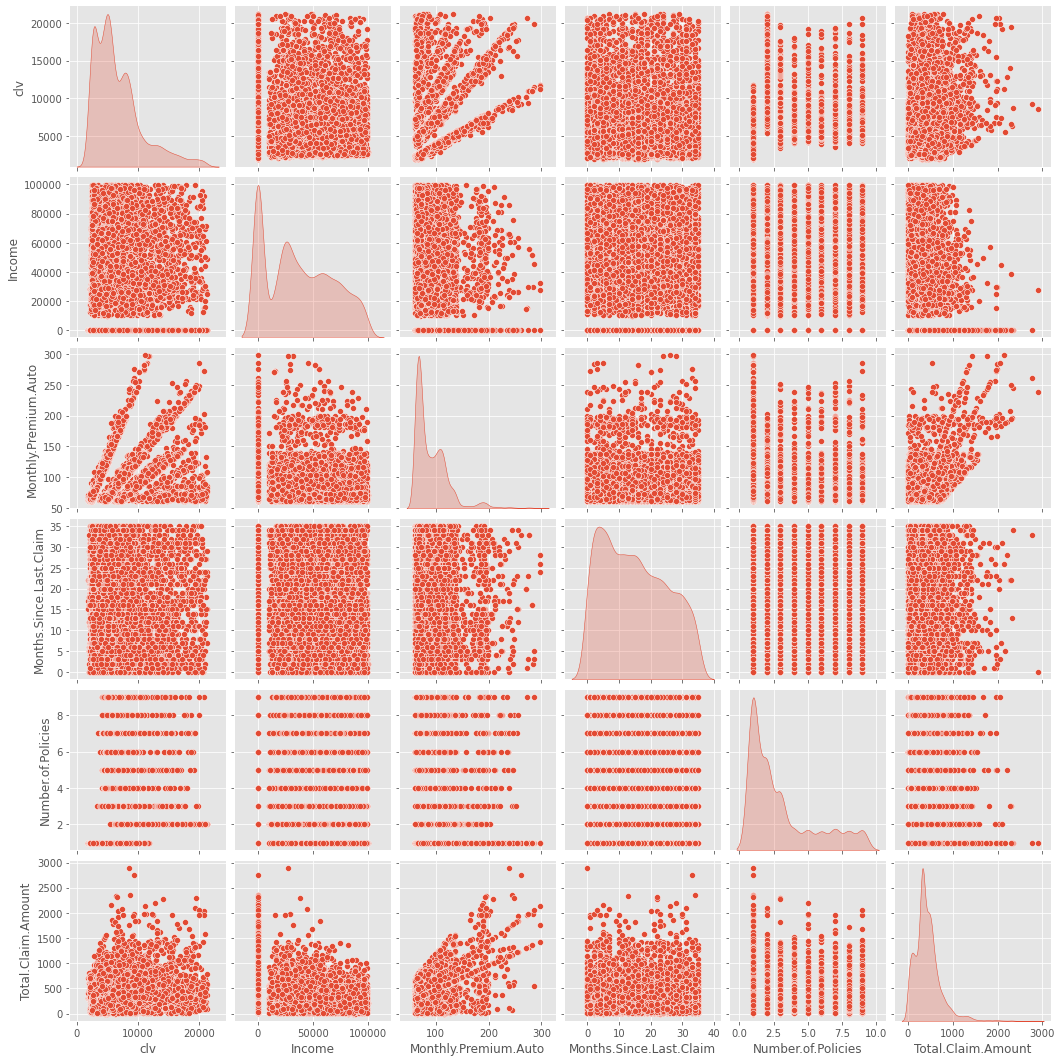

In [97]:
sns.pairplot(da[["clv","EmploymentStatus","Income","Location.Code","Monthly.Premium.Auto","Months.Since.Last.Claim","Number.of.Policies","Policy.Type","Vehicle.Class","Vehicle.Size","Total.Claim.Amount"]],diag_kind="kde")

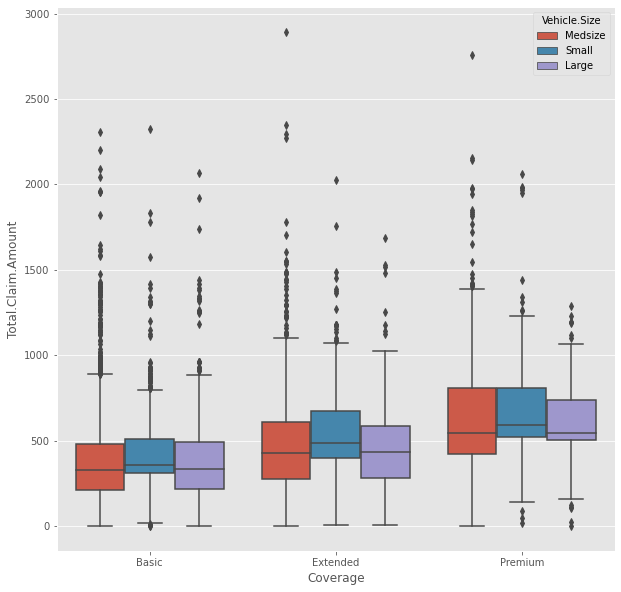

In [98]:
sns.boxplot(x= 'Coverage' ,y ='Total.Claim.Amount', hue='Vehicle.Size', data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

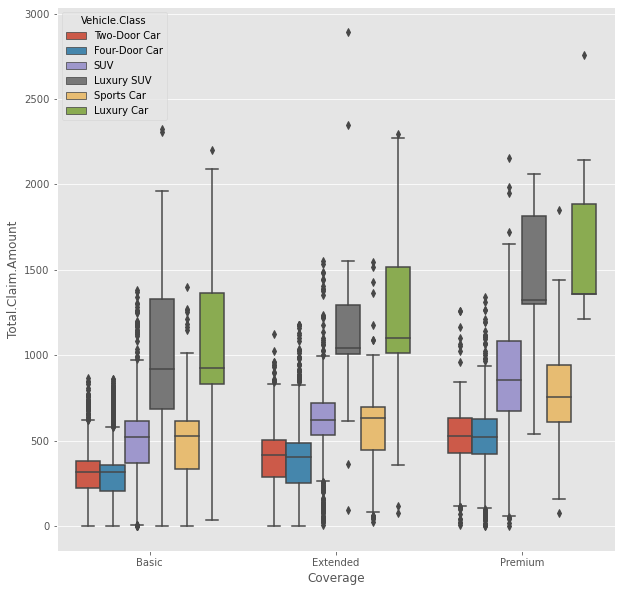

In [99]:
sns.boxplot(x= 'Coverage' ,y ='Total.Claim.Amount', hue='Vehicle.Class', data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

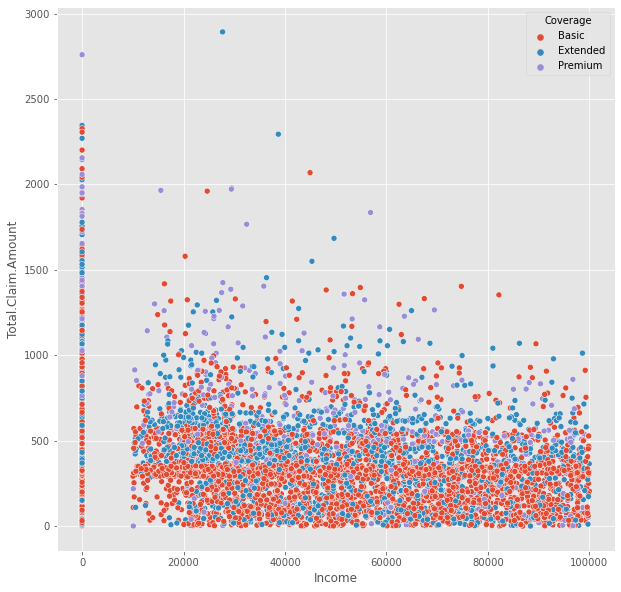

In [100]:
sns.scatterplot(x = "Income", y = "Total.Claim.Amount", hue = "Coverage" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

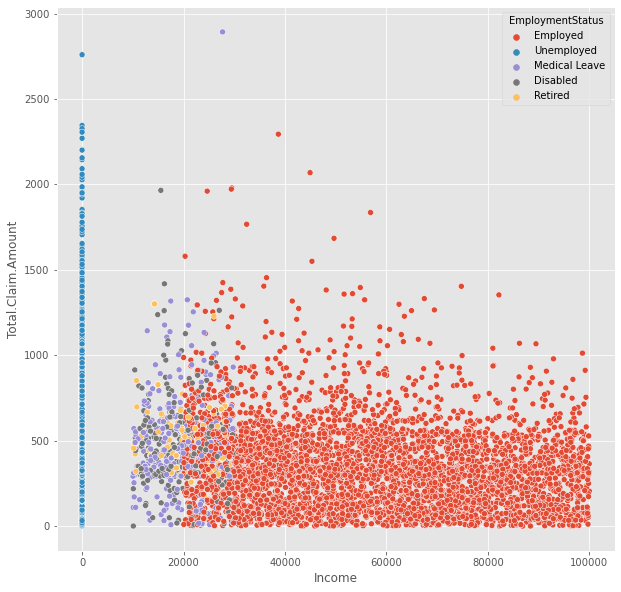

In [101]:
sns.scatterplot(x = "Income", y = "Total.Claim.Amount", hue = "EmploymentStatus" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

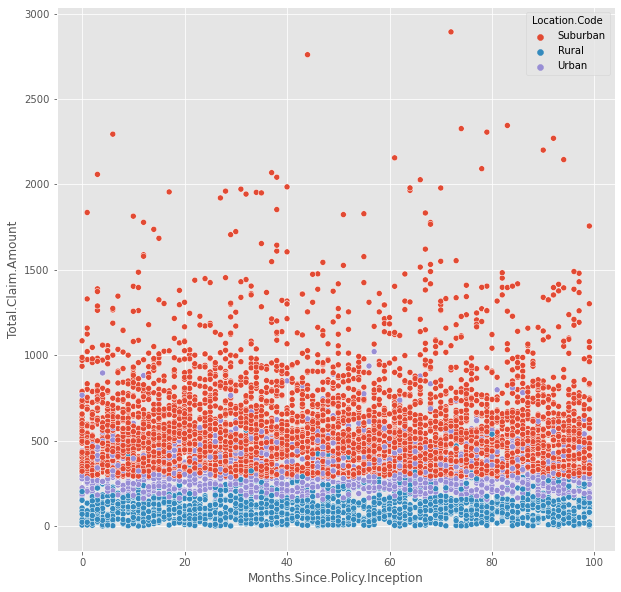

In [102]:
sns.scatterplot(x = "Months.Since.Policy.Inception", y = "Total.Claim.Amount", hue = "Location.Code" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

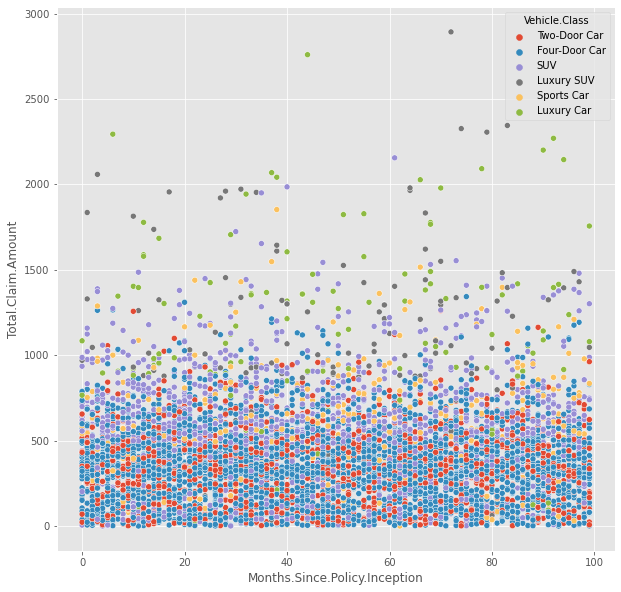

In [103]:
sns.scatterplot(x = "Months.Since.Policy.Inception", y = "Total.Claim.Amount", hue = "Vehicle.Class" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

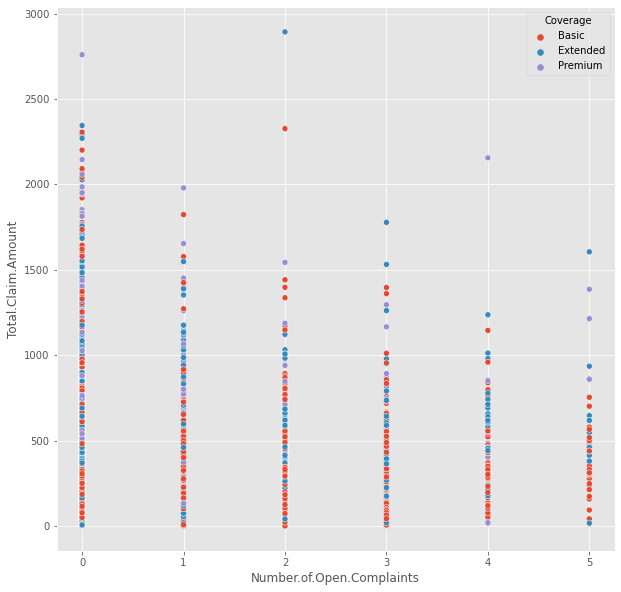

In [104]:
sns.scatterplot(x = "Number.of.Open.Complaints", y = "Total.Claim.Amount", hue = "Coverage" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

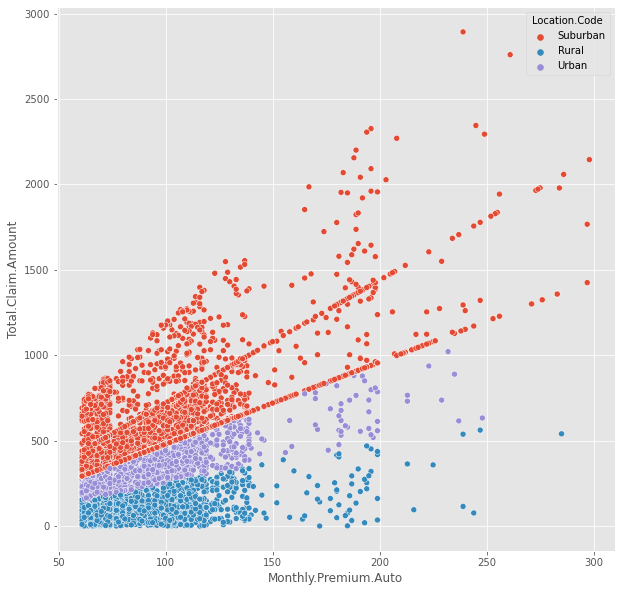

In [105]:
sns.scatterplot(x = "Monthly.Premium.Auto", y = "Total.Claim.Amount", hue = "Location.Code" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

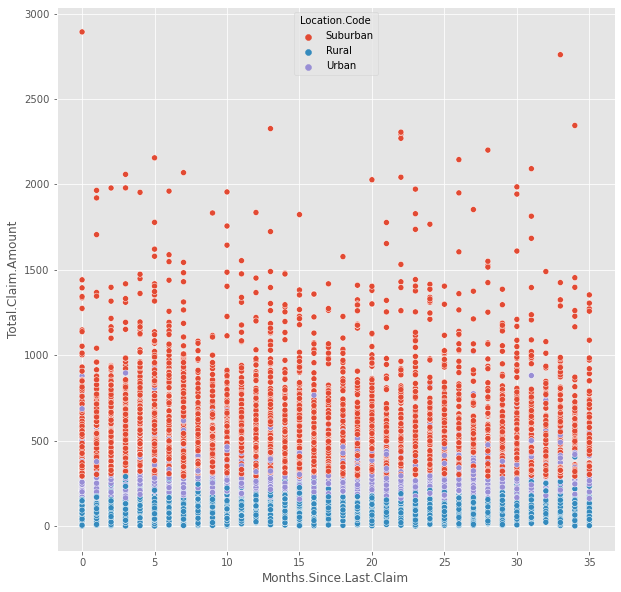

In [106]:
sns.scatterplot(x = "Months.Since.Last.Claim", y = "Total.Claim.Amount", hue = "Location.Code" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

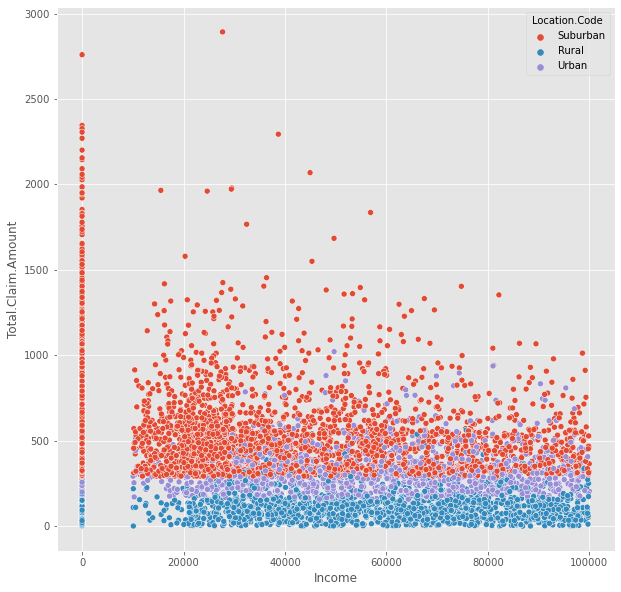

In [107]:
sns.scatterplot(x = "Income", y = "Total.Claim.Amount", hue = "Location.Code" ,data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

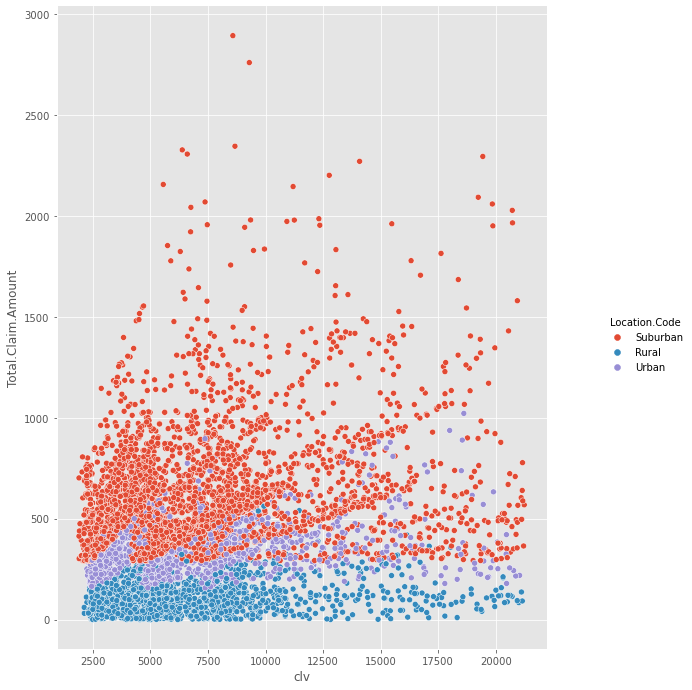

In [108]:
sns.relplot( x="clv", y="Total.Claim.Amount", hue="Location.Code", data = da)
fig = plt.gcf()
fig.set_size_inches(10, 10)

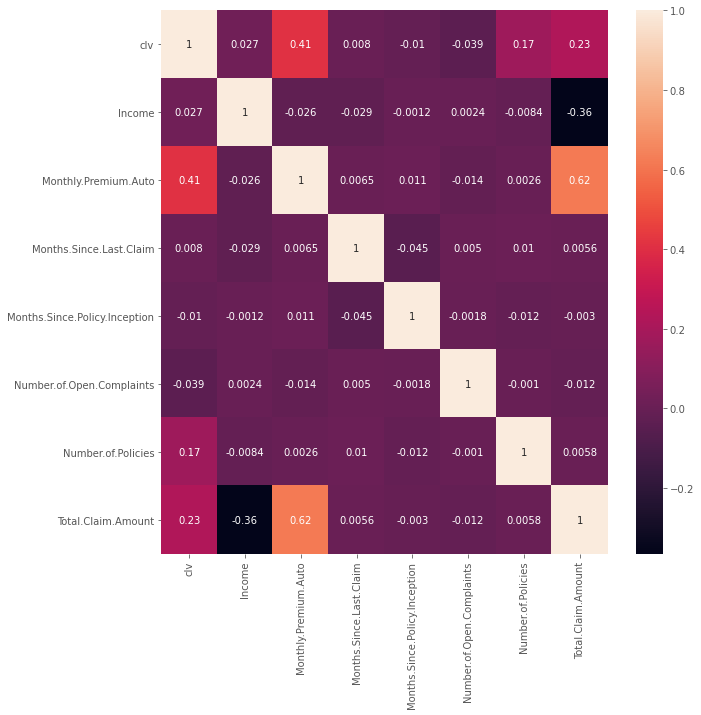

In [109]:
sns.heatmap(da.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Prediction

# Linear Rigression

In [110]:
ds = da.drop(["Response","Education","Gender","Marital.Status","Policy","Renew.Offer.Type","Sales.Channel","Total.Claim.Amount"],axis=1)
X = pd.DataFrame(ds)
encoder = LabelEncoder()

for i in X.columns:
    if isinstance(X[i][0], str):
            X[i] = encoder.fit_transform(X[i])

In [111]:
X.head()

,clv,Coverage,EmploymentStatus,Income,Location.Code,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Vehicle.Class,Vehicle.Size
0,2763.519279,0,1,56274,1,69,32,5,0,1,0,5,1
1,6979.535903,1,4,0,1,94,13,42,0,8,1,0,1
2,12887.431650,2,1,48767,1,108,18,38,0,2,1,5,1
3,7645.861827,0,4,0,1,106,18,65,0,7,0,3,1
4,2813.692575,0,1,43836,0,73,12,44,0,1,1,0,1


In [112]:
y = pd.DataFrame(da["Total.Claim.Amount"])
y.head()

,Total.Claim.Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [113]:
Lg = LinearRegression()

In [114]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.2, random_state = 42)

In [115]:
Lg.fit(train_X,train_y)

LinearRegression()

In [116]:
pred = Lg.predict(test_X)
prediction = pd.DataFrame(pred,columns=["prediction"])
prediction.shape

(1726, 1)

In [117]:
prediction.head()

,prediction
0,286.997825
1,551.041061
2,494.165112
3,328.656062
4,663.819793


In [118]:
test_y.head()

,Total.Claim.Amount
2333,71.773341
1420,561.600000
2623,504.000000
5709,40.401396
7246,784.800000


In [119]:
Lg.score(X,y)*100

58.80677593308916

In [120]:
rmse1 = np.sqrt(mean_squared_error(test_y,prediction))
r21 = r2_score(test_y,prediction)
print(rmse1)
print(r21*100)

189.06156363051414
58.128280298973436


# Polynomial Regression

In [121]:
for i in range(0,13):
    if(i==5 or i==6 or i==7):
        continue 
    else:
        li=[0,1,2,3,4,8,9,10,11,12]
        for j in li:
            X_Poli = np.ndarray([8630,13])
            X_Poli[:,:j]= X.iloc[:,i].values.reshape(-1,1)
      

In [122]:
Poli5 = PolynomialFeatures(degree = 2) 
X_Poli5 = Poli5.fit_transform(X.iloc[:,5].values.reshape(-1,1)) 

In [123]:
Poli6 = PolynomialFeatures(degree = 4) 
X_Poli6 = Poli6.fit_transform(X.iloc[:,6].values.reshape(-1,1))

In [124]:
Poli7 = PolynomialFeatures(degree = 4) 
X_Poli7 = Poli7.fit_transform(X.iloc[:,7].values.reshape(-1,1))

In [125]:
X_ = np.concatenate((X_Poli,X_Poli5,X_Poli6,X_Poli7), axis=1)

In [126]:
XPoli = pd.DataFrame(X_)
XPoli.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,32.0,1024.0,32768.0,1048576.0,1.0,5.0,25.0,125.0,625.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,13.0,169.0,2197.0,28561.0,1.0,42.0,1764.0,74088.0,3111696.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,18.0,324.0,5832.0,104976.0,1.0,38.0,1444.0,54872.0,2085136.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,18.0,324.0,5832.0,104976.0,1.0,65.0,4225.0,274625.0,17850625.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,12.0,144.0,1728.0,20736.0,1.0,44.0,1936.0,85184.0,3748096.0


In [138]:
XPoli.fillna(XPoli.mean(), inplace=True)

In [139]:
trainX, testX, trainy, testy = train_test_split(XPoli,y,test_size=.2, random_state = 2)

In [140]:
Lg.fit(trainX,trainy)

LinearRegression()

In [141]:
Pred = Lg.predict(testX)
Prediction = pd.DataFrame(Pred,columns=["Prediction"])
Prediction.shape

(1726, 1)

In [142]:
Prediction.head()

,Prediction
0,299.008114
1,313.827158
2,372.957760
3,495.112004
4,321.307367


In [143]:
rmse = np.sqrt(mean_squared_error(testy,Prediction))
r22 = r2_score(testy,Prediction)
print(rmse)
print(r22*100)

225.4160532266584
40.23537894193233


In [144]:
Lg.score(XPoli,y)*100

39.31706587102794

# Gradient Boosting

In [145]:
X3 = pd.DataFrame(ds)
X3.head()

,clv,Coverage,EmploymentStatus,Income,Location.Code,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Vehicle.Class,Vehicle.Size
0,2763.519279,0,1,56274,1,69,32,5,0,1,0,5,1
1,6979.535903,1,4,0,1,94,13,42,0,8,1,0,1
2,12887.431650,2,1,48767,1,108,18,38,0,2,1,5,1
3,7645.861827,0,4,0,1,106,18,65,0,7,0,3,1
4,2813.692575,0,1,43836,0,73,12,44,0,1,1,0,1


In [146]:
y.head()

,Total.Claim.Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [147]:
X_tra, X_te, y_tra, y_te = train_test_split(X3, y, test_size=0.2,random_state=12)

In [148]:
reg = ensemble.GradientBoostingRegressor(learning_rate = 0.15,n_estimators=500)
reg.fit(X_tra, y_tra.values.ravel())


GradientBoostingRegressor(learning_rate=0.15, n_estimators=500)

In [149]:
predd = reg.predict(X_te)
Predd = pd.DataFrame(predd, columns=["Preiction"])

Predd.head()

,Preiction
0,60.538124
1,1037.933915
2,129.520372
3,427.826412
4,559.489195


In [150]:
reg.score(X3,y)*100

88.99787085951121

In [151]:
y_tee = y_te.reset_index()
y_tee1 = y_tee.drop("index",axis=1)
y_tee1.head()

,Total.Claim.Amount
0,145.990089
1,921.600000
2,115.072340
3,463.382118
4,561.600000


In [152]:
Predd.size

1726

In [153]:
rms = np.sqrt(mean_squared_error(y_te,Predd))
r2_ = r2_score(y_te,Predd)
print(rms)
print(r2_*100)

116.92220893420344
81.28558064857194


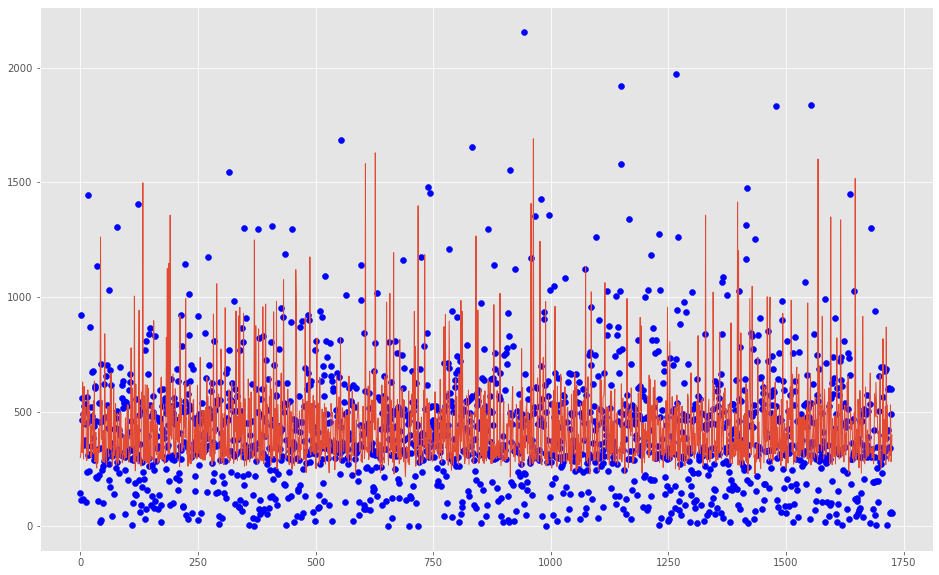

In [154]:
plt.figure(figsize=(16,10))
plt.scatter(data = y_tee1, x = y_tee1.index , y = "Total.Claim.Amount" , label = "Orignal" ,color = "b")
plt.plot(Pred,label = "Predicted",linewidth = 1)